# Sales Prediction


In [27]:
import pandas as pd
import numpy as np


# Load Data

In [28]:
df = pd.read_csv('sa')

In [29]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# DROP Unecessary Columns

In [30]:
df= df.drop(columns='Unnamed: 0')

In [31]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Basic descriptive statistics

In [32]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualization


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram

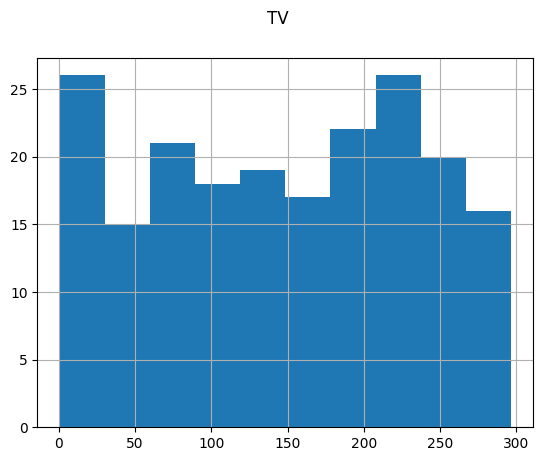

In [34]:
col ='TV'
df[col].hist()
plt.suptitle('TV')
plt.show()

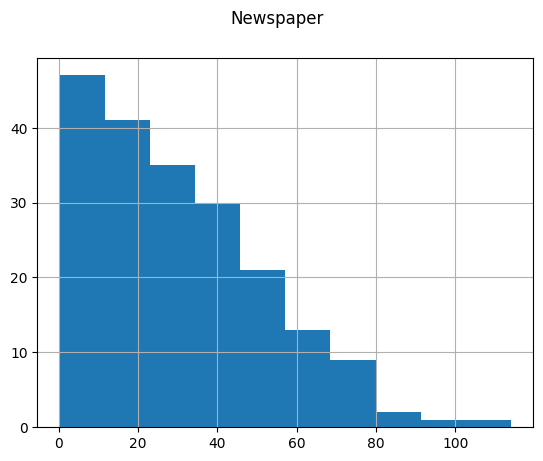

In [35]:
col ='Newspaper'
df[col].hist()
plt.suptitle('Newspaper')
plt.show()

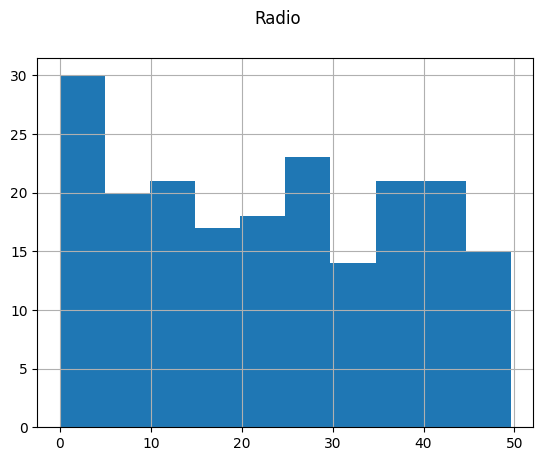

In [36]:
col ='Radio'
df[col].hist()
plt.suptitle('Radio')
plt.show()

In [37]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Pair Plot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


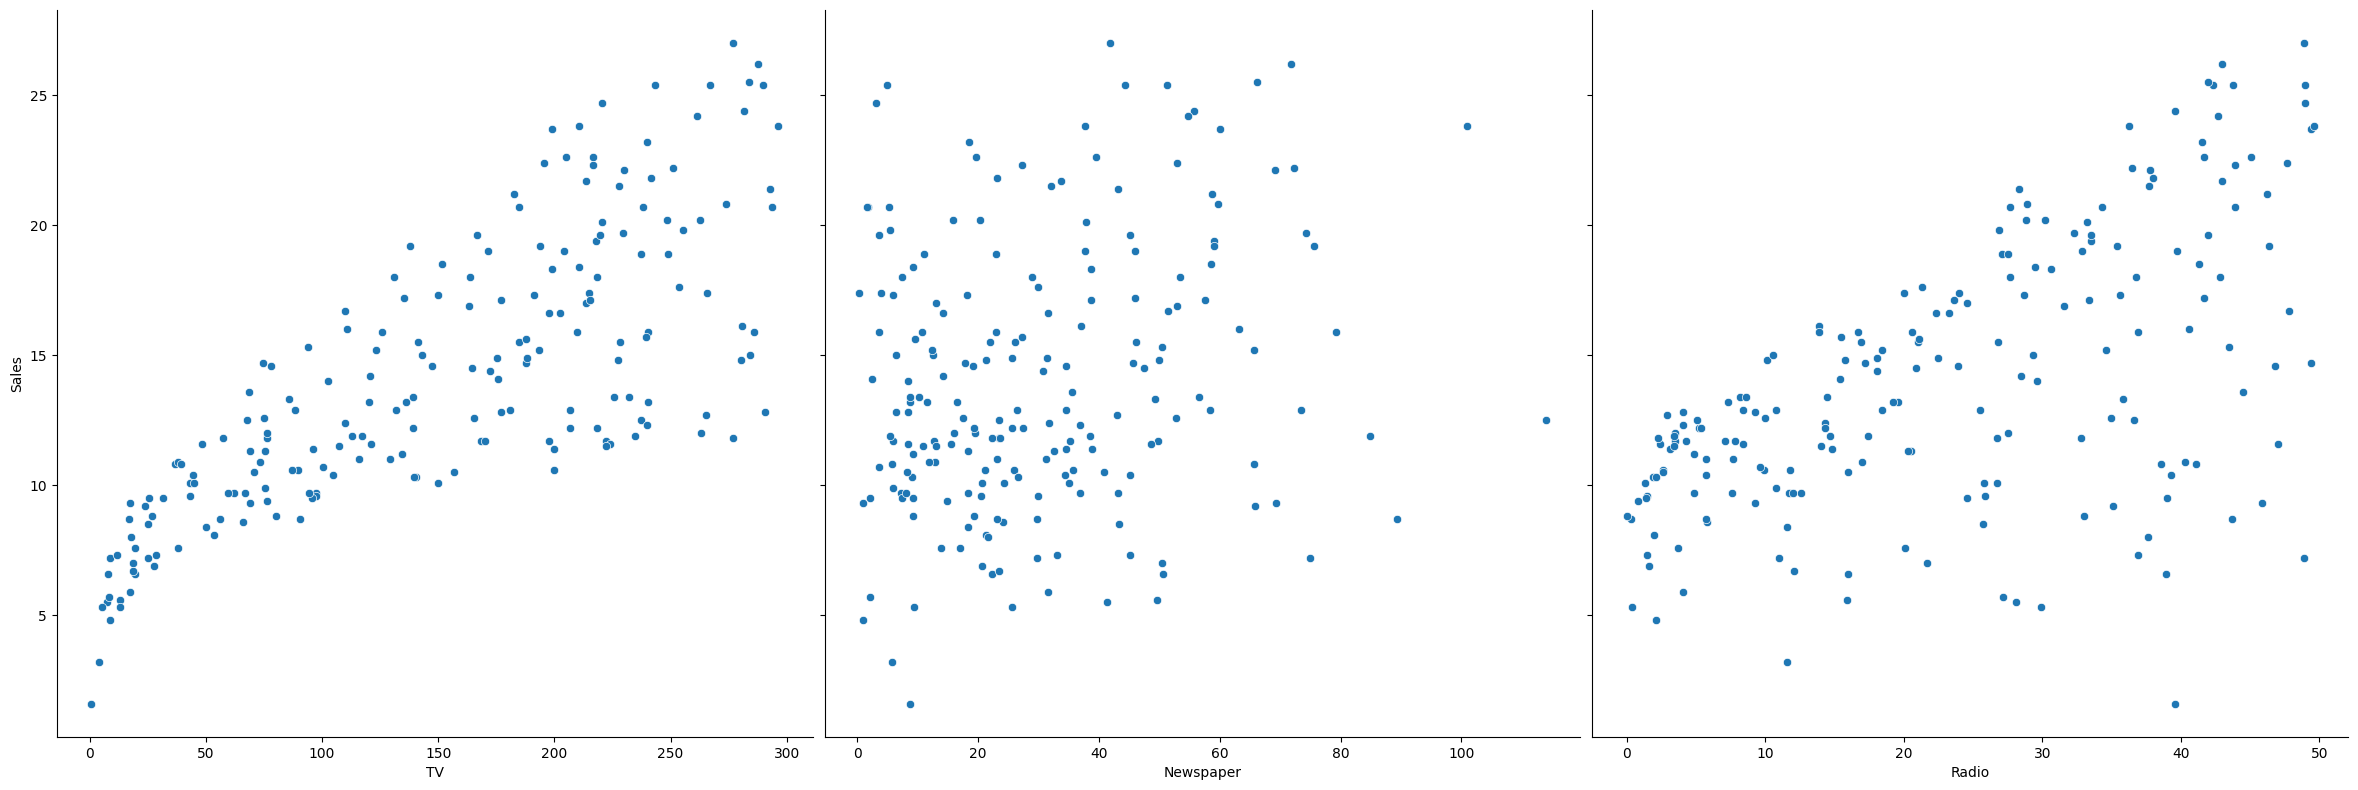

In [38]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars = 'Sales',height = 8)

## Box Plot

Text(0.5, 1.0, 'Box Plot of Advertising Costs')

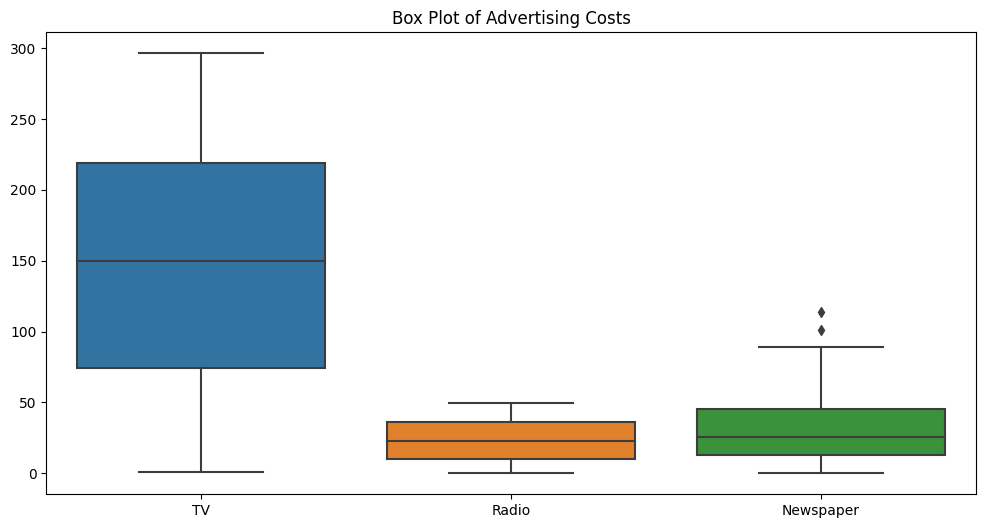

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Box Plot of Advertising Costs')


# Linear regression plot of columns advertising vs sales

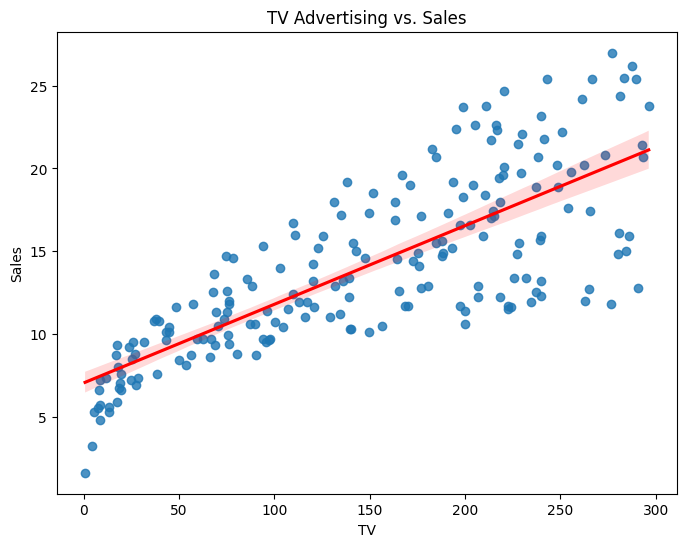

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(x='TV', y='Sales', data=df, line_kws={'color': 'red'})
plt.title('TV Advertising vs. Sales')
plt.show()

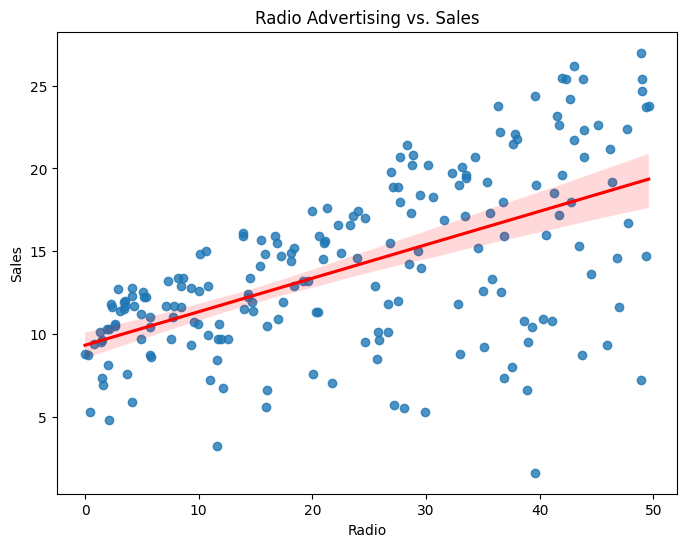

In [41]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Radio', y='Sales', data=df,line_kws={'color': 'red'})
plt.title('Radio Advertising vs. Sales')
plt.show()

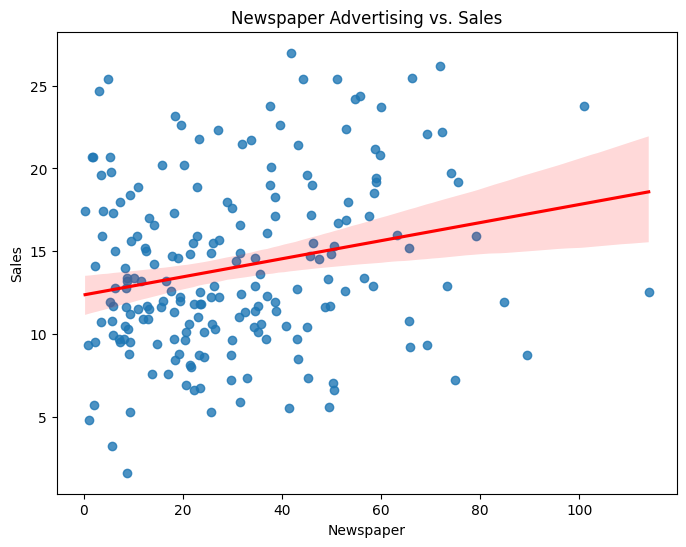

In [42]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Newspaper', y='Sales', data=df,line_kws={'color': 'red'})
plt.title('Newspaper Advertising vs. Sales')
plt.show()

# Checking for any null values

In [43]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Splitting into dependent and independent variables

In [44]:
x=df.drop(columns='Sales')
y=df['Sales']

In [45]:
x



,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [46]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Splitting the data into train and test

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

In [49]:
ridge=cross_val_score(Ridge(), x_test, y_test,cv=8)
np.average(ridge)

0.595527388755814

In [50]:
linear=cross_val_score(LinearRegression(), x_test, y_test,cv=8)
np.average(linear)

0.595523812328994

In [51]:
lasso=cross_val_score(Lasso(), x_test, y_test,cv=9)
np.average(lasso)

0.553514797728845

In [52]:
decision=cross_val_score(DecisionTreeRegressor(), x_test, y_test,cv=8)
np.average(decision)

0.8603892084562269

# Training the model

In [53]:
finalmodel=DecisionTreeRegressor()
finalmodel.fit(x_test,y_test)

DecisionTreeRegressor()

In [54]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
TV=230.1
Radio=37.8
Newspaper=69.2
data=[[TV,Radio,Newspaper]]

prediction=finalmodel.predict(data)
print(prediction[0])

21.5


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Checking the r2 score and root mean squared error

In [56]:
def scores(y_test,y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("Root_Mean_Squared_error: ", rmse)
    print("R2 Score(Accuracy): {:.2f}%".format(r2 * 100))

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
finalmodel.fit(x_train,y_train)
y_pred2=finalmodel.predict(x_test)
scores(y_test,y_pred2)

Root_Mean_Squared_error:  1.1881357947081077
R2 Score(Accuracy): 96.24%


# Got an Accuracy of 96%